#🎯 Contexto

Quando medimos uma proporção em uma amostra, como por exemplo:

* A proporção de pessoas que responderam "sim" numa pesquisa.
* A proporção de cura com determinado tratamento.
* A proporção de alunos aprovados numa escola.

... queremos saber como essa proporção se comporta ao coletar várias amostras — ou seja, qual é a distribuição amostral da proporção.

# 🧠 O que é a distribuição amostral da proporção?

É a distribuição das proporções obtidas em várias amostras de mesmo tamanho, retiradas de uma população com uma proporção verdadeira
𝑝.

🧪 Exemplo:
Se a proporção real de pessoas que votam em certo candidato é
𝑝 = 0,60, ao coletarmos várias amostras de 𝑛 = 100 eleitores, nem todas as amostras darão exatamente 0,60. Algumas darão 0,57, outras 0,62… Essa variabilidade forma uma distribuição.

# 🧮 Exemplo

Suponha que, em uma disputa eleitoral entre o Candidato A e o Candidato B, 0,6% dos eleitores preferem o Candidato A. Se uma amostra aleatória de 10 eleitores fosse pesquisada, é improvável que exatamente 60% deles (6) preferissem o Candidato A. Por acaso, a proporção na amostra que prefere o Candidato A poderia facilmente ser um pouco menor que 0,6% ou um pouco maior que 0,6%. A distribuição amostral de p é a distribuição que resultaria se 10 eleitores fossem amostrados repetidamente e a proporção (p) que favorece o Candidato A fosse determinada.

**A distribuição amostral de p é um caso especial da distribuição amostral da média.**

A Tabela 1 mostra uma amostra aleatória hipotética de 10 eleitores. Aqueles que preferem o Candidato A recebem pontuação 1 e aqueles que preferem o Candidato B recebem pontuação 0.

In [1]:
from scipy.stats import binom, norm
import pandas as pd
import matplotlib.pylab as plt
import numpy as np

In [2]:
sample = pd.Series([1, 1, 1, 1, 1, 1, 1, 0, 0, 0], name='Sample voters')
sample.to_frame()

,Sample voters
0,1
1,1
2,1
3,1
4,1
5,1
6,1
7,0
8,0
9,0


Observe que sete dos eleitores preferem o candidato A, portanto a proporção amostral (p) é

$p = \frac{7}{10} = 0,70$

Como você pode ver, p é a média das 10 pontuações de preferência.

In [3]:
p = sample.mean()
p

np.float64(0.7)

# ✅ Média e Desvio Padrão da Distribuição Amostral de 𝑝

Seja p^ a proporção observada na amostra:

* A média das proporções amostrais é igual à proporção verdadeira da população. Ou seja, é um estimador imparcial.

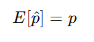

* Já o desvio padrão das proporções amostrais mede a variabilidade das proporções amostrais ao redor de p

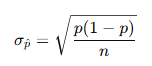

A distribuição amostral das proporções pode ser aproximada por uma normal se:

* 𝑛𝑝 ≥ 10 e
* 𝑛(1−𝑝)≥ 10

Ou seja, precisamos de amostra grande o suficiente para garantir que temos pelo menos 10 sucessos e 10 fracassos esperados.

Se as condições forem satisfeitas, a distribuição amostral das proporções será aproximadamente normal:

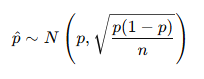

Voltando ao exemplo do eleitor, p = 0,60 e 𝑛 = 100. Portanto, a média da distribuição amostral de p é 0,60. O erro padrão é

$\sigma_p=\sqrt{\frac{0.6(1-0.6)}{100}}=0.049$

Ou seja, a maior parte das amostras vai gerar proporções entre aproximadamente 0,50 e 0,70 (± 2 desvios padrão).

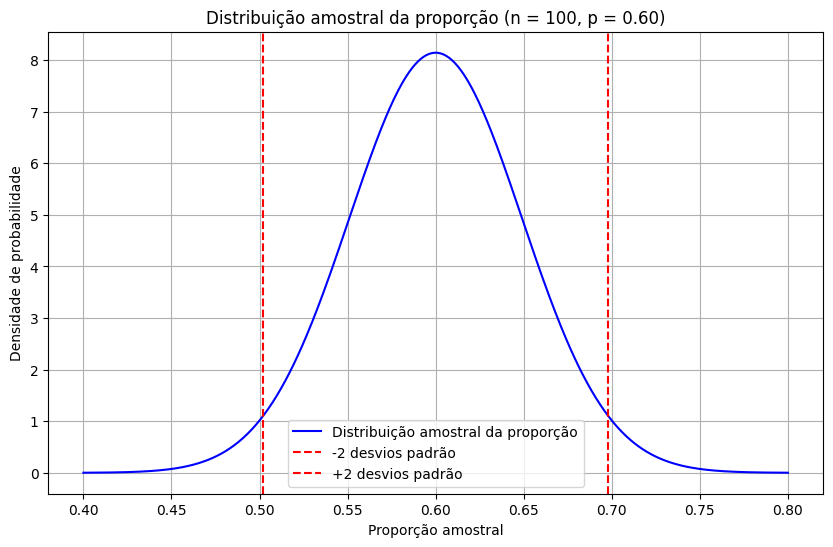

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Parâmetros do problema
p = 0.60
n = 100
mean = p
std = np.sqrt(p * (1 - p) / n)

# Intervalo de x para o gráfico
x = np.linspace(0.4, 0.8, 500)
y = norm.pdf(x, mean, std)

# Gráfico
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Distribuição amostral da proporção', color='blue')
plt.axvline(p - 2 * std, color='red', linestyle='--', label='-2 desvios padrão')
plt.axvline(p + 2 * std, color='red', linestyle='--', label='+2 desvios padrão')
plt.title('Distribuição amostral da proporção (n = 100, p = 0.60)')
plt.xlabel('Proporção amostral')
plt.ylabel('Densidade de probabilidade')
plt.legend()
plt.grid(True)
plt.show()
